In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

In [2]:
#calculates with normal inhibition
def normalinhibition(bn,bd,br,ncells,dcells,rcells,m,p,krs):
    davg = np.roll(dcells,1)
    davg += np.roll(dcells,-1)
    davg /= 2.
    
    nnew = bn - ncells 
    dnew = bd * (1 / (1 + (rcells**m))) - dcells
    rnew = br * (((ncells*davg)**p) / ((krs**p) + ((ncells*davg)**p))) - rcells
    
    return nnew,dnew,rnew

In [35]:
#calculates with mutual inhibition
def mutualinhibition(bn,bd,br,ncells,dcells,rcells,m,p,krs,kc):
    
    davg = np.roll(dcells,1)
    davg += np.roll(dcells,-1)
    davg /= 2.
    navg = np.roll(ncells,1)
    navg += np.roll(ncells,-1)
    navg /= 2.
    
    #      bn - ncells - (ncells*davg) - (ncells*(dcells/kc))
    nnew = bn + ncells*( -1 - davg - (dcells/kc)) 
    
    #      bd*(1 / (1 + (rcells**m))) - dcells - navg*dcells - ncells*(dcells/kc)
    dnew = bd*(1 / (1 + (rcells**m))) + dcells*( -1 - navg - (ncells/kc)) 
    
    ndpow = (ncells*davg)**p
    #      br*(((ncells*davg)**p) / ((krs**p) + ((ncells*davg)**p))) - rcells
    rnew = br*(ndpow / ((krs**p) + ndpow)) - rcells 
    
    return nnew,dnew,rnew

In [36]:
# Function used to simulate normal inhibition

def simulate_normal(Tmax,Nday,bn,bd,br,ncells,dcells,rcells,m,p,krs):
    Nhistory = [np.array(ncells)]
    Dhistory = [np.array(dcells)]
    Rhistory = [np.array(rcells)]
    n=np.array(ncells)
    d=np.array(dcells)
    r=np.array(rcells)
    Nsteps=int(Tmax)*Nday
    dt = 1./Nday
    for k in range(Nsteps):
        nd,dd,rd = normalinhibition(bn,bd,br,n,d,r,m,p,krs)
        n += nd*dt
        d += dd*dt
        r += rd*dt
        if k%100==0:
            Nhistory.append(np.array(n))
            Dhistory.append(np.array(d))
            Rhistory.append(np.array(r))
        
    return np.array(Nhistory),np.array(Dhistory),np.array(Rhistory)

In [37]:
# Function used to simulate mutual inhibition

def simulate_mutual(Tmax,Nday,bn,bd,br,ncells,dcells,rcells,m,p,krs,kc):
    Nhistory = [np.array(ncells)]
    Dhistory = [np.array(dcells)]
    Rhistory = [np.array(rcells)]
    n=np.array(ncells)
    d=np.array(dcells)
    r=np.array(rcells)
    Nsteps=Tmax*Nday
    Nsteps = int(Nsteps)
    dt = 1./Nday
    for k in range(Nsteps):
        nd,dd,rd = mutualinhibition(bn,bd,br,n,d,r,m,p,krs,kc)
        n += nd*dt
        d += dd*dt
        r += rd*dt
        if k%100==0:
            Nhistory.append(np.array(n))
            Dhistory.append(np.array(d))
            Rhistory.append(np.array(r))
        
    return np.array(Nhistory),np.array(Dhistory),np.array(Rhistory)

In [16]:
bn=200
bd = 1000
br = 3000
krs = 30000
m=1
p=2

ncells = np.array([2.,1.9])
dcells = np.array([10.,10.])
rcells = np.array([30.,30.])
nnorm,dnorm,rnorm = simulate_normal(100,1000,bn,bd,br,ncells,dcells,rcells,m,p,krs)

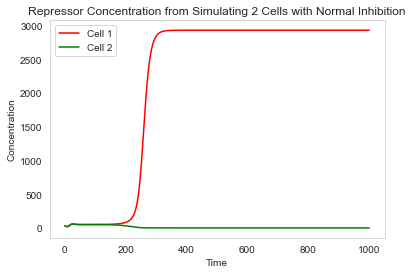

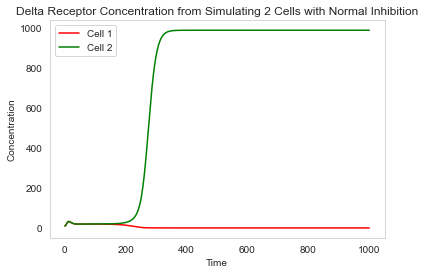

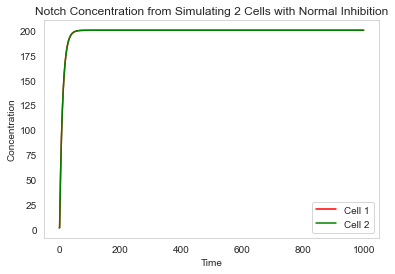

[Text(0.5, 16.0, 'Cell #'),
 Text(34.0, 0.5, 'Time'),
 Text(0.5, 1.0, 'Delta Concentration from Simulating 2 Cells with Normal Inhibition')]

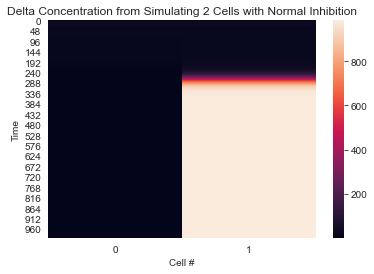

In [17]:
#For normal the N, D, and R is just the regular concentration
# For mutual the N and D are activated concentrations, while R is just regular concentration



plt.plot(rnorm[:,0],color='red',label="Cell 1")
plt.plot(rnorm[:,1],color='green',label="Cell 2")
plt.title("Repressor Concentration from Simulating 2 Cells with Normal Inhibition")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

plt.plot(dnorm[:,0],color='red',label="Cell 1")
plt.plot(dnorm[:,1],color='green',label="Cell 2")
plt.title("Delta Receptor Concentration from Simulating 2 Cells with Normal Inhibition")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

plt.plot(nnorm[:,0],color='red',label="Cell 1")
plt.plot(nnorm[:,1],color='green',label="Cell 2")
plt.title("Notch Concentration from Simulating 2 Cells with Normal Inhibition")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

#heat map: x axis is cell, y axis is time and color shows concentration
s = sns.heatmap(dnorm)
s.set(xlabel="Cell #",ylabel="Time",title="Delta Concentration from Simulating 2 Cells with Normal Inhibition")

In [18]:
bn=200
bd = 1000
br = 3000
krs = 30000
m=2
p=1

ncells = np.array([2.,1.9])
dcells = np.array([10.,10.])
rcells = np.array([30.,30.])
nnorm,dnorm,rnorm = simulate_normal(100,1000,bn,bd,br,ncells,dcells,rcells,m,p,krs)

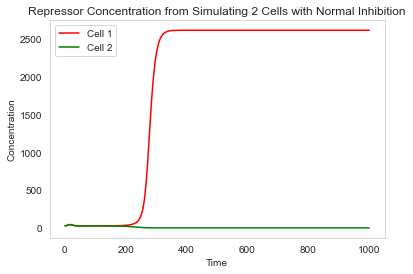

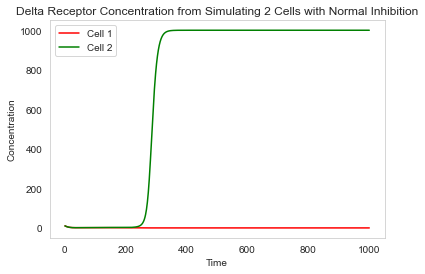

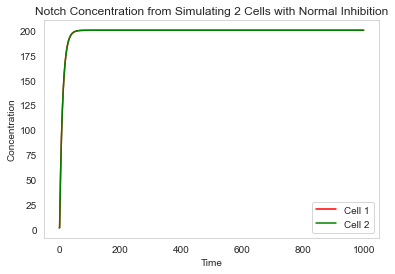

[Text(0.5, 16.0, 'Cell #'),
 Text(34.0, 0.5, 'Time'),
 Text(0.5, 1.0, 'Delta Receptor Concentration from Simulating 2 Cells with Normal Inhibition')]

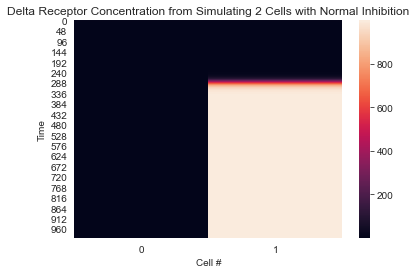

In [15]:

plt.plot(rnorm[:,0],color='red',label="Cell 1")
plt.plot(rnorm[:,1],color='green',label="Cell 2")
plt.title("Repressor Concentration from Simulating 2 Cells with Normal Inhibition")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

plt.plot(dnorm[:,0],color='red',label="Cell 1")
plt.plot(dnorm[:,1],color='green',label="Cell 2")
plt.title("Delta Receptor Concentration from Simulating 2 Cells with Normal Inhibition")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

plt.plot(nnorm[:,0],color='red',label="Cell 1")
plt.plot(nnorm[:,1],color='green',label="Cell 2")
plt.title("Notch Concentration from Simulating 2 Cells with Normal Inhibition")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

#heat map: x axis is cell, y axis is time and color shows concentration
s = sns.heatmap(dnorm)
s.set(xlabel="Cell #",ylabel="Time",title="Delta Receptor Concentration from Simulating 2 Cells with Normal Inhibition")

In [53]:
bn=200
bd = 1000
br = 3000
krs = 30000
m=1
p=1

ncells = np.array([2.,1.9])
dcells = np.array([10.,10.])
rcells = np.array([30.,30.])
nnorm,dnorm,rnorm = simulate_normal(100,1000,bn,bd,br,ncells,dcells,rcells,m,p,krs)

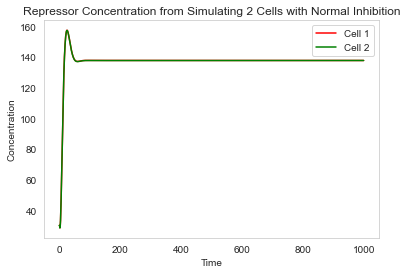

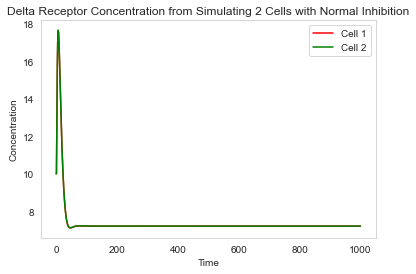

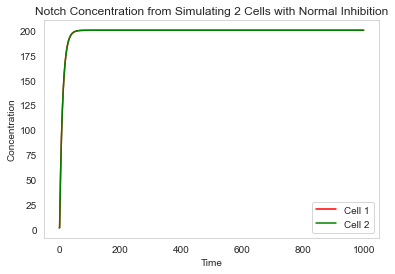

[Text(0.5, 16.0, 'Cell #'),
 Text(34.0, 0.5, 'Time'),
 Text(0.5, 1.0, 'Delta Receptor Concentration from Simulating 2 Cells with Normal Inhibition and no Cooperativity')]

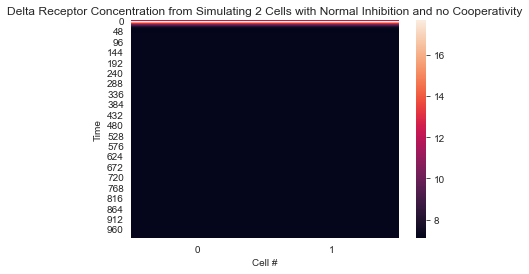

In [54]:

plt.plot(rnorm[:,0],color='red',label="Cell 1")
plt.plot(rnorm[:,1],color='green',label="Cell 2")
plt.title("Repressor Concentration from Simulating 2 Cells with Normal Inhibition")

plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()


plt.plot(dnorm[:,0],color='red',label="Cell 1")
plt.plot(dnorm[:,1],color='green',label="Cell 2")
plt.title("Delta Receptor Concentration from Simulating 2 Cells with Normal Inhibition")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

plt.plot(nnorm[:,0],color='red',label="Cell 1")
plt.plot(nnorm[:,1],color='green',label="Cell 2")
plt.title("Notch Concentration from Simulating 2 Cells with Normal Inhibition")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

#heat map: x axis is cell, y axis is time and color shows concentration
s = sns.heatmap(dnorm)
s.set(xlabel="Cell #",ylabel="Time",title="Delta Receptor Concentration from Simulating 2 Cells with Normal Inhibition and no Cooperativity")

In [44]:

bn=200
bd = 1000
br = 3000
krs = 30000
m=2
p=1
kc = .55

ncells = np.array([2.,1.9])
dcells = np.array([10.,10.])
rcells = np.array([30.,30.])
nmut,dmut,rmut = simulate_mutual(100,1000,bn,bd,br,ncells,dcells,rcells,m,p,krs,kc)



[Text(0.5, 16.0, 'Cell #'),
 Text(34.0, 0.5, 'Time'),
 Text(0.5, 1.0, 'Delta Concentration from Simulating 2 Cells with Mutual Inhibition')]

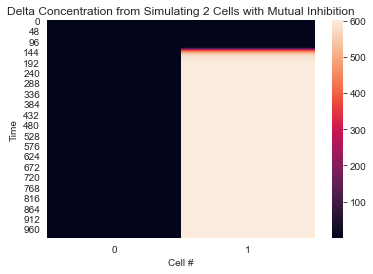

In [48]:

#heat map: x axis is cell, y axis is time and color shows concentration
s = sns.heatmap(dmut)
s.set(xlabel="Cell #",ylabel="Time",title="Delta Concentration from Simulating 2 Cells with Mutual Inhibition")

In [59]:

bn=200
bd = 1000
br = 3000
krs = 30000
m=1
p=2
kc = .55

ncells = np.array([2.,1.9])
dcells = np.array([10.,10.])
rcells = np.array([30.,30.])
nmut,dmut,rmut = simulate_mutual(100,1000,bn,bd,br,ncells,dcells,rcells,m,p,krs,kc)



[Text(0.5, 16.0, 'Cell #'),
 Text(34.0, 0.5, 'Time'),
 Text(0.5, 1.0, 'Delta Concentration from Simulating 2 Cells with Mutual Inhibition')]

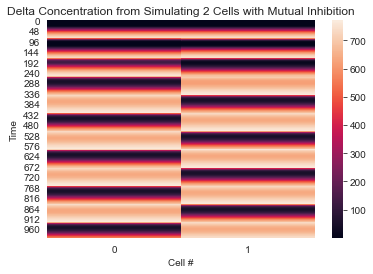

In [60]:

#heat map: x axis is cell, y axis is time and color shows concentration
s = sns.heatmap(dmut)
s.set(xlabel="Cell #",ylabel="Time",title="Delta Concentration from Simulating 2 Cells with Mutual Inhibition")

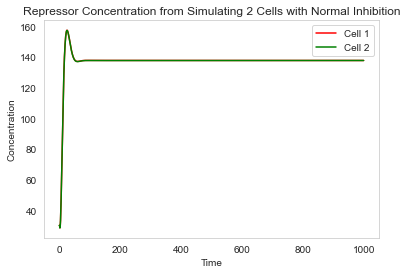

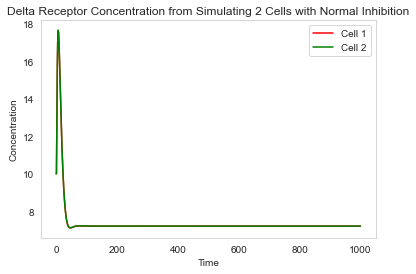

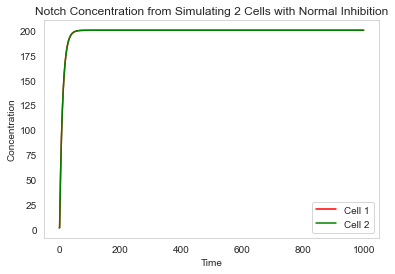

[Text(0.5, 16.0, 'Cell #'),
 Text(34.0, 0.5, 'Time'),
 Text(0.5, 1.0, 'Delta Concentration from Simulating 2 Cells with Mutual Inhibition')]

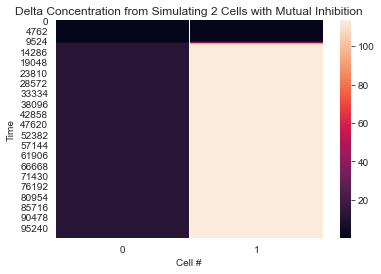

In [64]:

bn=200
bd = 1000
br = 3000
krs = 30000
m=1
p=1
kc = .55

ncells = np.array([2.,1.9])
dcells = np.array([10.,10.])
rcells = np.array([30.,30.])
nmut,dmut,rmut = simulate_mutual(1000,10000,bn,bd,br,ncells,dcells,rcells,m,p,krs,kc)


plt.plot(rnorm[:,0],color='red',label="Cell 1")
plt.plot(rnorm[:,1],color='green',label="Cell 2")
plt.title("Repressor Concentration from Simulating 2 Cells with Normal Inhibition")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

plt.plot(dnorm[:,0],color='red',label="Cell 1")
plt.plot(dnorm[:,1],color='green',label="Cell 2")
plt.title("Delta Receptor Concentration from Simulating 2 Cells with Normal Inhibition")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

plt.plot(nnorm[:,0],color='red',label="Cell 1")
plt.plot(nnorm[:,1],color='green',label="Cell 2")
plt.title("Notch Concentration from Simulating 2 Cells with Normal Inhibition")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

#heat map: x axis is cell, y axis is time and color shows concentration
s = sns.heatmap(dmut)
s.set(xlabel="Cell #",ylabel="Time",title="Delta Concentration from Simulating 2 Cells with Mutual Inhibition")

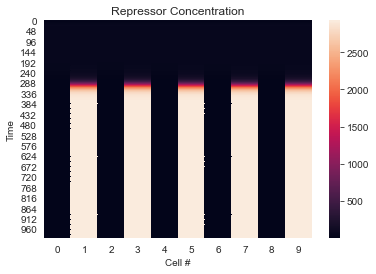

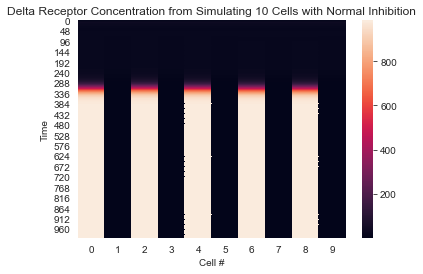

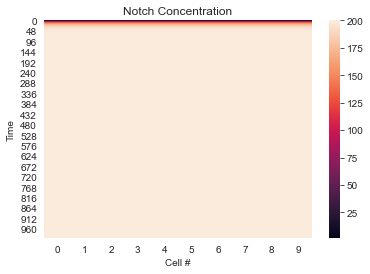

In [68]:


bn=200
bd = 1000
br = 3000
krs = 30000
m=1
p=2

ncells = np.array([2.,2.,1.9,2.,2.,2.,2.,2.,2.,2.])
dcells = np.array([10.,10.,10.,10.,10.,10.,10.,10.,10.,10.])
rcells = np.array([30.,30.,30.,30.,30.,30.,30.,30.,30.,30.])
nnorm5,dnorm5,rnorm5 = simulate_normal(100,1000,bn,bd,br,ncells,dcells,rcells,m,p,krs)

#heat map: x axis is cell, y axis is time and color shows concentration
sr = sns.heatmap(rnorm5)
sr.set(xlabel="Cell #",ylabel="Time",title="Repressor Concentration")
plt.show()

sd = sns.heatmap(dnorm5)
sd.set(xlabel="Cell #",ylabel="Time",title="Delta Receptor Concentration from Simulating 10 Cells with Normal Inhibition")
plt.show()

sn = sns.heatmap(nnorm5)
sn.set(xlabel="Cell #",ylabel="Time",title="Notch Concentration")

plt.show()

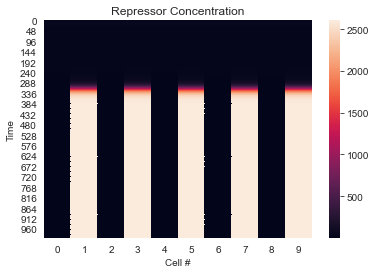

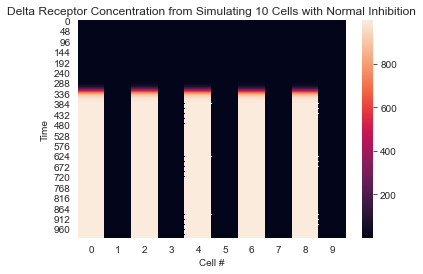

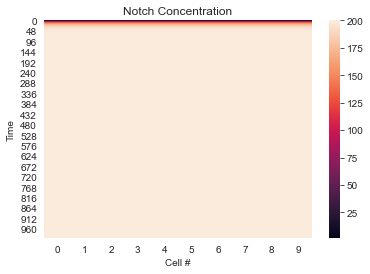

In [69]:
bn=200
bd = 1000
br = 3000
krs = 30000
m=2
p=1

ncells = np.array([2.,2.,1.9,2.,2.,2.,2.,2.,2.,2.])
dcells = np.array([10.,10.,10.,10.,10.,10.,10.,10.,10.,10.])
rcells = np.array([30.,30.,30.,30.,30.,30.,30.,30.,30.,30.])
nnorm5,dnorm5,rnorm5 = simulate_normal(100,1000,bn,bd,br,ncells,dcells,rcells,m,p,krs)

#heat map: x axis is cell, y axis is time and color shows concentration
sr = sns.heatmap(rnorm5)
sr.set(xlabel="Cell #",ylabel="Time",title="Repressor Concentration")
plt.show()

sd = sns.heatmap(dnorm5)
sd.set(xlabel="Cell #",ylabel="Time",title="Delta Receptor Concentration from Simulating 10 Cells with Normal Inhibition")
plt.show()

sn = sns.heatmap(nnorm5)
sn.set(xlabel="Cell #",ylabel="Time",title="Notch Concentration")

plt.show()

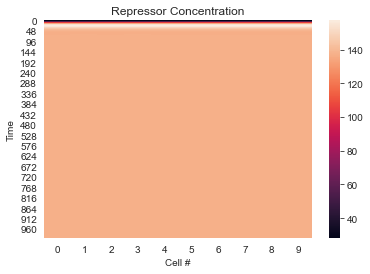

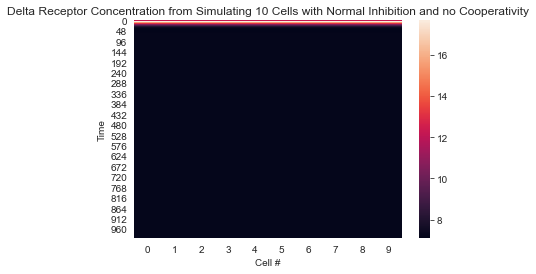

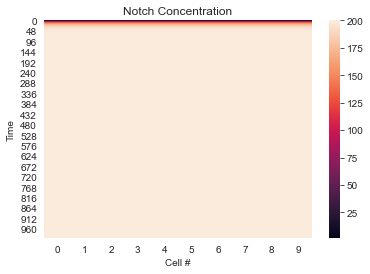

In [67]:

bn=200
bd = 1000
br = 3000
krs = 30000
m=1
p=1

ncells = np.array([2.,2.,1.9,2.,2.,2.,2.,2.,2.,2.])
dcells = np.array([10.,10.,10.,10.,10.,10.,10.,10.,10.,10.])
rcells = np.array([30.,30.,30.,30.,30.,30.,30.,30.,30.,30.])
nnorm5,dnorm5,rnorm5 = simulate_normal(100,1000,bn,bd,br,ncells,dcells,rcells,m,p,krs)

#heat map: x axis is cell, y axis is time and color shows concentration
sr = sns.heatmap(rnorm5)
sr.set(xlabel="Cell #",ylabel="Time",title="Repressor Concentration")
plt.show()

sd = sns.heatmap(dnorm5)
sd.set(xlabel="Cell #",ylabel="Time",title="Delta Receptor Concentration from Simulating 10 Cells with Normal Inhibition and no Cooperativity")
plt.show()

sn = sns.heatmap(nnorm5)
sn.set(xlabel="Cell #",ylabel="Time",title="Notch Concentration")

plt.show()

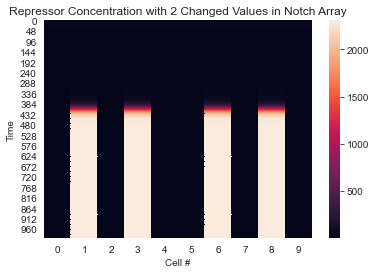

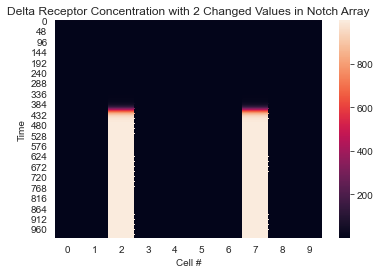

In [75]:
#This shows defect

bn=200
bd = 1000
br = 3000
krs = 30000
m=2
p=1

ncells = np.array([2.,2.,1.9,2.,2.,2.,2.,1.9,2.,2.])
dcells = np.array([10.,10.,10.,10.,10.,10.,10.,10.,10.,10.])
rcells = np.array([30.,30.,30.,30.,30.,30.,30.,30.,30.,30.])
nnorm5,dnorm5,rnorm5 = simulate_normal(100,1000,bn,bd,br,ncells,dcells,rcells,m,p,krs)


sr = sns.heatmap(rnorm5)
sr.set(xlabel="Cell #",ylabel="Time",title="Repressor Concentration with 2 Changed Values in Notch Array")
plt.show()

sd = sns.heatmap(dnorm5)
sd.set(xlabel="Cell #",ylabel="Time",title="Delta Receptor Concentration with 2 Changed Values in Notch Array")
plt.show()

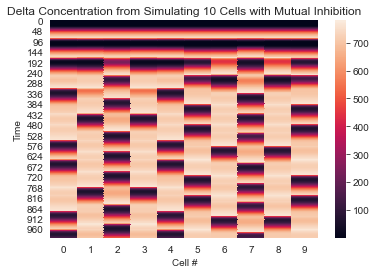

In [76]:

bn=200
bd = 1000
br = 3000
krs = 30000
m=1
p=2
kc = .55

ncells = np.array([2.,2.,1.9,2.,2.,2.,2.,2.,2.,2.])
dcells = np.array([10.,10.,10.,10.,10.,10.,10.,10.,10.,10.])
rcells = np.array([30.,30.,30.,30.,30.,30.,30.,30.,30.,30.])
nmut5,dmut5,rmut5 = simulate_mutual(100,1000,bn,bd,br,ncells,dcells,rcells,m,p,krs,kc)

sd = sns.heatmap(dmut5)
sd.set(xlabel="Cell #",ylabel="Time",title="Delta Concentration from Simulating 10 Cells with Mutual Inhibition")
plt.show()

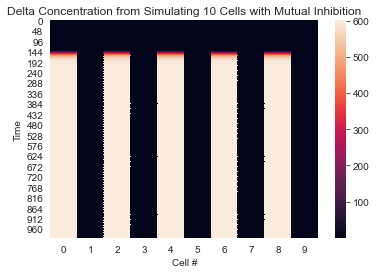

In [77]:

bn=200
bd = 1000
br = 3000
krs = 30000
m=2
p=1
kc = .55

ncells = np.array([2.,2.,1.9,2.,2.,2.,2.,2.,2.,2.])
dcells = np.array([10.,10.,10.,10.,10.,10.,10.,10.,10.,10.])
rcells = np.array([30.,30.,30.,30.,30.,30.,30.,30.,30.,30.])
nmut5,dmut5,rmut5 = simulate_mutual(100,1000,bn,bd,br,ncells,dcells,rcells,m,p,krs,kc)

sd = sns.heatmap(dmut5)
sd.set(xlabel="Cell #",ylabel="Time",title="Delta Concentration from Simulating 10 Cells with Mutual Inhibition")
plt.show()

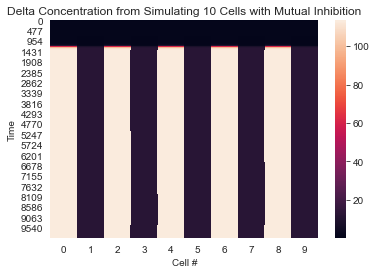

In [79]:

bn=200
bd = 1000
br = 3000
krs = 30000
m=1
p=1
kc = .55
#try setting all values to 10 in all arrays and change one value
ncells = np.array([2.,2.,1.9,2.,2.,2.,2.,2.,2.,2.])
dcells = np.array([10.,10.,10.,10.,10.,10.,10.,10.,10.,10.])
rcells = np.array([30.,30.,30.,30.,30.,30.,30.,30.,30.,30.])
nmut5,dmut5,rmut5 = simulate_mutual(1000,1000,bn,bd,br,ncells,dcells,rcells,m,p,krs,kc)

sd = sns.heatmap(dmut5)
sd.set(xlabel="Cell #",ylabel="Time",title="Delta Concentration from Simulating 10 Cells with Mutual Inhibition")
plt.show()

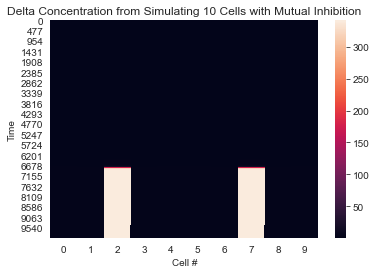

In [80]:

bn=200
bd = 1000
br = 3000
krs = 30000
m=1
p=1
kc = .55
#try setting all values to 10 in all arrays and change one value
ncells = np.array([2.,2.,1.9,2.,2.,2.,2.,1.9,2.,2.])
dcells = np.array([10.,10.,10.,10.,10.,10.,10.,10.,10.,10.])
rcells = np.array([30.,30.,30.,30.,30.,30.,30.,30.,30.,30.])
nmut5,dmut5,rmut5 = simulate_mutual(1000,1000,bn,bd,br,ncells,dcells,rcells,m,p,krs,kc)

sd = sns.heatmap(dmut5)
sd.set(xlabel="Cell #",ylabel="Time",title="Delta Concentration from Simulating 10 Cells with Mutual Inhibition")
plt.show()

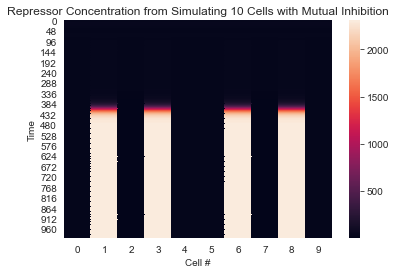

In [82]:
sr = sns.heatmap(rnorm5)
sr.set(xlabel="Cell #",ylabel="Time",title="Repressor Concentration from Simulating 10 Cells with Mutual Inhibition")
plt.show()

<ipython-input-35-5a21d213f923>:11: RuntimeWarning: overflow encountered in multiply
  nnew = bn + ncells*( -1 - davg - (dcells/kc))
<ipython-input-35-5a21d213f923>:14: RuntimeWarning: overflow encountered in multiply
  dnew = bd*(1 / (1 + (rcells**m))) + dcells*( -1 - navg - (ncells/kc))
<ipython-input-35-5a21d213f923>:16: RuntimeWarning: overflow encountered in multiply
  ndpow = (ncells*davg)**p
<ipython-input-35-5a21d213f923>:18: RuntimeWarning: invalid value encountered in true_divide
  rnew = br*(ndpow / ((krs**p) + ndpow)) - rcells
<ipython-input-35-5a21d213f923>:7: RuntimeWarning: invalid value encountered in add
  navg += np.roll(ncells,-1)
<ipython-input-35-5a21d213f923>:11: RuntimeWarning: invalid value encountered in subtract
  nnew = bn + ncells*( -1 - davg - (dcells/kc))
<ipython-input-35-5a21d213f923>:14: RuntimeWarning: invalid value encountered in subtract
  dnew = bd*(1 / (1 + (rcells**m))) + dcells*( -1 - navg - (ncells/kc))


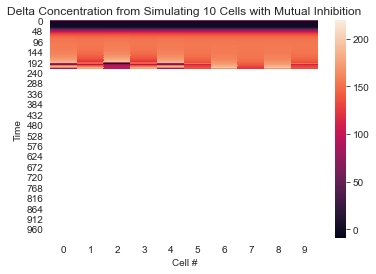

In [90]:

bn=200.
bd = 1000.
br = 3000.
krs = 30000.
m=1
p=1
kc = .1
#try setting all values to 10 in all arrays and change one value
ncells = np.array([2.,2.,1.9,2.,2.,2.,2.,2.,2.,2.])
dcells = np.array([100.,100.,100.,100.,100.,100.,100.,100.,100.,100.])
rcells = np.array([30.,30.,30.,30.,30.,30.,30.,30.,30.,30.])
nmut5,dmut5,rmut5 = simulate_mutual(100,1000,bn,bd,br,ncells,dcells,rcells,m,p,krs,kc)

sd = sns.heatmap(dmut5)
sd.set(xlabel="Cell #",ylabel="Time",title="Delta Concentration from Simulating 10 Cells with Mutual Inhibition")
plt.show()